In [2]:
import os
from dotenv import load_dotenv
import langchain
from langchain_google_genai import ChatGoogleGenerativeAI

In [3]:
print(langchain.__version__)

1.2.0


In [4]:
load_dotenv()
api_key=os.getenv("google_flash")

llm=ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    api_key=api_key,
    temperature=0.6
)
llm

ChatGoogleGenerativeAI(profile={'max_input_tokens': 1048576, 'max_output_tokens': 65536, 'image_inputs': True, 'audio_inputs': True, 'pdf_inputs': True, 'video_inputs': True, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'image_tool_message': True, 'tool_choice': True}, google_api_key=SecretStr('**********'), model='gemini-2.5-flash', temperature=0.6, client=<google.genai.client.Client object at 0x00000198981A4EC0>, default_metadata=(), model_kwargs={})

In [5]:
from langchain import agents
print("\nAvailable in langchain.agents:")
print([item for item in dir(agents) if not item.startswith('_')])


Available in langchain.agents:
['AgentState', 'create_agent', 'factory', 'middleware', 'structured_output']


In [6]:
from langchain import tools
print([i for i in dir(tools) if not i.startswith('_')])

['BaseTool', 'InjectedState', 'InjectedStore', 'InjectedToolArg', 'InjectedToolCallId', 'ToolException', 'ToolRuntime', 'tool', 'tool_node']


In [7]:
from langchain_core.tools import Tool
from langchain import chat_models
print([i for i in dir(chat_models) if not i.startswith('_')])

['BaseChatModel', 'base', 'init_chat_model']


In [8]:
from langchain_core.tools import tool

@tool
def add(a:int, b:int)->int:
    '''Adding two numbers together'''
    return a+b
@tool
def subtract(a:int, b:int)->int:
    '''Subtracting two numbers together'''
    return a-b

print(add.invoke({'a':1,'b':2}))
print(subtract.invoke({'a':1,'b':2}))

3
-1


In [9]:
llm_with_tools = llm.bind_tools([add, subtract])
response=llm_with_tools.invoke("what is the number when 5 gets subracted from 10?")
response

AIMessage(content='', additional_kwargs={'function_call': {'name': 'subtract', 'arguments': '{"b": 5, "a": 10}'}, '__gemini_function_call_thought_signatures__': {'2314d78c-432f-449b-9152-11a06fda5822': 'CuIBAXLI2nxQvXTM4DUmDpFydrFBCVuJYj0xkEnIHT0fFU3aYXeBpr1hOVX3ulElU00rcCuCMHLG+3kSUYXmJYF4K3j7QlIB1XgwZoCZndZ89NFZTK48ntnElPjLV6ASkou48ZqvD+6hlZl0D8WjluXUmY7JMua8AGU5XkVNeE2PZHNpbTDOF7NKyMggXX0GOpZYWcWtS6tvuMbkd5BhNdCUYr3ps5V9Odn2QhI+DhIq+0I5Yfib8t4RFPF9fCW2CqBeNcqyjgAJvCPyg4MwjlXbjodioZ/iERsk543a+TqjJxzZqg=='}}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019b50dc-5841-7243-94aa-b631c1d58282-0', tool_calls=[{'name': 'subtract', 'args': {'b': 5, 'a': 10}, 'id': '2314d78c-432f-449b-9152-11a06fda5822', 'type': 'tool_call'}], usage_metadata={'input_tokens': 107, 'output_tokens': 74, 'total_tokens': 181, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 55}})

In [10]:
print(response.tool_calls)

param=response.tool_calls[0]
print(param)

result=subtract.invoke(param['args'])
print(result)

[{'name': 'subtract', 'args': {'b': 5, 'a': 10}, 'id': '2314d78c-432f-449b-9152-11a06fda5822', 'type': 'tool_call'}]
{'name': 'subtract', 'args': {'b': 5, 'a': 10}, 'id': '2314d78c-432f-449b-9152-11a06fda5822', 'type': 'tool_call'}
5


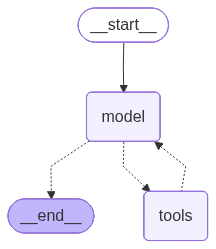

In [24]:
from langchain.agents import create_agent

agent=create_agent(
    model=llm,
    tools=[add, subtract],
    system_prompt="You are mathematician and choose calculation wisely"
)
agent

In [32]:
responses= agent.invoke({"messages":[{"role":"user","content":"What is 2 plus 5?"}]})
responses

{'messages': [HumanMessage(content='What is 2 plus 5?', additional_kwargs={}, response_metadata={}, id='091e12d2-d10a-4b37-8a38-8b25ae1174b5'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'add', 'arguments': '{"a": 2, "b": 5}'}, '__gemini_function_call_thought_signatures__': {'3a0e27a6-0efe-47ec-8f4b-d542268ede1e': 'CuoBAXLI2nzQ2iAhWNe0UVKWagzHtt+KFR2ig73SWhvqBx3+0GVQUTFzASjdLM6U5mJPBIuExTc/J3J36M/n5hVW9DOZt7dsjwOUvFrr9bo+vrOSxDTZVfxLC4x125ZhQ/mtuO3tM6rzLAqEl1rzhrReLye9u6KqsGB3fI+KIvVbcq+wk2c0PVvithWFphHez2OTMGr6nDac1s1D78pGppIX33P9AIX5nABAx+SHLdVlFVAaLCFyf9ObN5ScIyyhyhfvt8yoSTK6kQtETtqGzSobIVXALJYCP7vQxkhy/D6674Uw8ndXhClMYPHP'}}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019b5130-e467-7280-8087-42258ee7aab3-0', tool_calls=[{'name': 'add', 'args': {'a': 2, 'b': 5}, 'id': '3a0e27a6-0efe-47ec-8f4b-d542268ede1e', 'type': 'tool_call'}], usage_metadata={'input_to

In [37]:
responses['messages'][-1]

AIMessage(content='2 plus 5 is 7.', additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019b5130-f033-7940-b910-411a2349c95c-0', usage_metadata={'input_tokens': 138, 'output_tokens': 8, 'total_tokens': 146, 'input_token_details': {'cache_read': 0}})

In [39]:
responses_1=agent.invoke({"messages":"what is the number when 5 gets subtracted from 10?"})
responses_1['messages'][-1].content

'The number is 5.'

In [23]:
from langchain_core import retrievers

print([ele for ele in dir(retrievers) if not ele.startswith('_')])

['ABC', 'Any', 'AsyncCallbackManager', 'BaseRetriever', 'CallbackManager', 'ConfigDict', 'Document', 'LangSmithRetrieverParams', 'RetrieverInput', 'RetrieverLike', 'RetrieverOutput', 'RetrieverOutputLike', 'Runnable', 'RunnableConfig', 'RunnableSerializable', 'Self', 'TYPE_CHECKING', 'TypedDict', 'abstractmethod', 'annotations', 'ensure_config', 'override', 'run_in_executor', 'signature']


In [43]:
responses_1

{'messages': [HumanMessage(content='what is the number when 5 gets subtracted from 10?', additional_kwargs={}, response_metadata={}, id='1ed47687-4e7d-46cf-8299-9df53f63c71d'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'subtract', 'arguments': '{"b": 5, "a": 10}'}, '__gemini_function_call_thought_signatures__': {'6559fa44-0eab-461a-ba2f-8ac8a3a3ece6': 'Cr4BAXLI2nzMI69rcm3lgPlHOQxFIR3YZYtGEJc0Mmtrhy0TJHgdgoT3gj4s+UumxaSw110yVXqKAY4RQKZIjngQNuioj4Q+wWfVnrfmeYsHyE846BWKwtCttHpOt+BjcPlsHP78ebRxOfsNKGchfjBQ4Io4Gut2TCVOteTsLIiLZol6iZtM6myCoy3MYR2OY64avgkgnQvteE6sHlUT5O7de6kPCV7shyuy7CVsLgtUy0NpaL7dmNTMoTnFeiwn9w=='}}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019b5139-9070-7f40-9573-b559c6b74b35-0', tool_calls=[{'name': 'subtract', 'args': {'b': 5, 'a': 10}, 'id': '6559fa44-0eab-461a-ba2f-8ac8a3a3ece6', 'type': 'tool_call'}], usage_metadata={'input_tokens': 113,